Parte 2 - Implementando o algoritmo de retropropagação em Python



In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing as pre
import time
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

In [2]:
'''
This Back-propagation algorithm is implemented on Bank note authentication UCI Dataset. Link is given below
Dataset Link: https://archive.ics.uci.edu/ml/datasets/banknote+authentication
'''

print("...............Reading the Dataset  and Dataset Pre-Processing ................")
start_time = time.time()
dataset = shuffle(pd.read_csv("../dados/data_banknote_authentication.txt"))
dataset.head(3)

...............Reading the Dataset  and Dataset Pre-Processing ................


,3.6216,8.6661,-2.8073,-0.44699,0
806,-4.29320,3.3419,0.77258,-0.99785,1
1054,-0.60254,1.7237,-2.15010,-0.77027,1
371,0.74307,11.1700,-1.38240,-4.07280,0


In [3]:
dataset.columns = ["Variance of Wavelet Transformed image", "Skewness of Wavelet Transformed image",
                "Curtosis of Wavelet Transformed image", "Entropy of image","Class"]

# Changing the values of the class to -1 and 1 for tanh activation function
dataset.loc[dataset['Class'] == 1, 'Class'] = -1
dataset.loc[dataset['Class'] == 0, 'Class'] = 1

x = dataset.drop('Class', axis=1)
y = dataset[['Class']]

dataset.head(3)

,Variance of Wavelet Transformed image,Skewness of Wavelet Transformed image,Curtosis of Wavelet Transformed image,Entropy of image,Class
806,-4.29320,3.3419,0.77258,-0.99785,-1
1054,-0.60254,1.7237,-2.15010,-0.77027,-1
371,0.74307,11.1700,-1.38240,-4.07280,1


In [4]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=4)
print('Shape of X_Train : ', x_train.shape)
print('Shape of Train class : ', y_train.shape)
print('Shape of X_test : ', x_test.shape)
print('Shape of Test class : ', y_test.shape)

Shape of X_Train :  (1096, 4)
Shape of Train class :  (1096, 1)
Shape of X_test :  (275, 4)
Shape of Test class :  (275, 1)


In [5]:
# Normalizing data using Standard Scaler Fit Transform
x_train = pre.StandardScaler().fit_transform(x_train)
x_test = pre.StandardScaler().fit_transform(x_test)

# Converting pd dataframe to numpy array to match compatibility
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

end_time = time.time()
total_time = end_time - start_time

print("Time Cost for Pre-processing and Reading the Dataset: %f seconds \n " % total_time)

Time Cost for Pre-processing and Reading the Dataset: 6.140453 seconds 
 


In [6]:
# Hyperbolic Tangent Activation function
def hyperbolic_tanh(x):
  return (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

# Hyperbolic derivative
def derivative_hyperbolic(x):
  return 1 - hyperbolic_tanh(x) * hyperbolic_tanh(x)

In [19]:

print("............... Initializing hyperparameters ................")
start_time = time.time()
# Setting Hyperparameters
np.random.seed(10)
# Quantidades de neurônios
inp = 4  # camadas de entrada
hd = 6   # camadas de escondidas
out = 1  # camadas de saída

actual_out_size = y_train.size
epochs = 15000  # iterações
eta = 0.001  # taxa de aprendizado
alpha = 0.7  # fator de momento
print("............... Setting 4 weights for hidden layers ................")
# Setting random weights for 4 hidden layers
w1_l1 = np.random.randn(inp, hd)
w2_l2 = np.random.randn(hd, hd)
w3_l3 = np.random.randn(hd, hd)
w4_l4 = np.random.randn(hd, hd)
out_w = np.random.randn(hd, out)


acc_list = []

end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Setting HyperParameters: %f seconds \n " %total_time)

............... Initializing hyperparameters ................
............... Setting 4 weights for hidden layers ................
Time Cost for Setting HyperParameters: 0.001398 seconds 
 


Parte 3 – Aplicação dos Ajustes de Parâmetros no Algoritmo

............... Training Backpropagation Algorithm ................
Training Accuracy: 94.0 %
Time Cost for Training algorithm: 32.301659 seconds 
 
............... Plotting Accuracy Curve ................


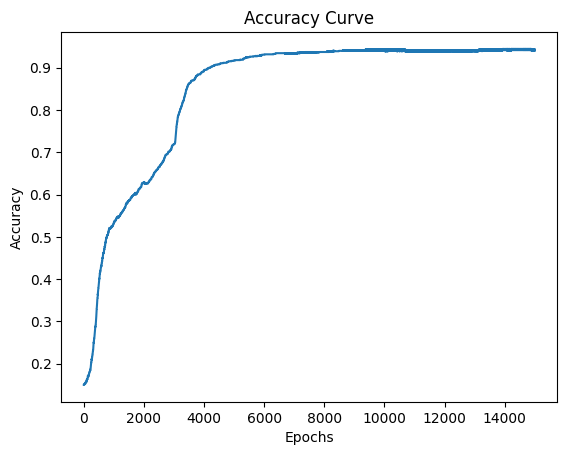

In [20]:
print("............... Training Backpropagation Algorithm ................")
start_time = time.time()
for i in range(epochs):
    # Feedforward for 4 hidden layers by calling activation function
    l1 = np.dot(x_train, w1_l1)
    l1_out = hyperbolic_tanh(l1)

    l2 = np.dot(l1_out, w2_l2)
    l2_out = hyperbolic_tanh(l2)

    l3 = np.dot(l2_out, w3_l3)
    l3_out = hyperbolic_tanh(l3)

    l4 = np.dot(l3_out, w4_l4)
    l4_out = hyperbolic_tanh(l4)

    output = np.dot(l4_out, out_w)
    final_out = hyperbolic_tanh(output)

    # Calculate accuracy
    final_out = final_out.round()
    calc_acc = (final_out == y_train).sum()
    acc = calc_acc / actual_out_size
    acc_list.append(acc)

    # Backpropagation for 4 hidden layers
    final_err = final_out - y_train
    final_sigmoid_derivative = final_err * derivative_hyperbolic(final_out)

    l4_err = np.dot(final_sigmoid_derivative, out_w.T)
    l4_derivative = l4_err * derivative_hyperbolic(l4_out)

    l3_err = np.dot(l4_derivative, w4_l4.T)
    l3_derivative = l3_err * derivative_hyperbolic(l3_out)

    l2_err = np.dot(l3_derivative, w3_l3.T)
    l2_derivative = l2_err * derivative_hyperbolic(l2_out)

    l1_err = np.dot(l2_derivative, w2_l2.T)
    l1_derivative = l1_err * derivative_hyperbolic(l1_out)


    # Divide weights as per size of output
    output_weights = np.dot(l4_out.T, final_sigmoid_derivative) / actual_out_size
    weights4 = np.dot(l3_out.T, l4_derivative) / actual_out_size
    weights3 = np.dot(l2_out.T, l3_derivative) / actual_out_size
    weights2 = np.dot(l1_out.T, l2_derivative) / actual_out_size
    weights1 = np.dot(x_train.T, l1_derivative) / actual_out_size

    out_w -= eta * alpha * output_weights
    w4_l4 -= eta * alpha * weights4
    w3_l3 -= eta * alpha * weights3
    w2_l2 -= eta * alpha * weights2
    w1_l1 -= eta * alpha * weights1

print("Training Accuracy: "+str(round(acc_list[-1],2) * 100) + " %")
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Training algorithm: %f seconds \n " %total_time)

print("............... Plotting Accuracy Curve ................")

plt.title("Accuracy Curve")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.plot(acc_list)
plt.show()

Parte 4 - Analisando os Resultados



In [22]:
print()
print("............... Testing Backpropagation Algorithm ................")
start_time = time.time()

# Feedforward for 4 hidden layers by calling activation function
l1_test = np.dot(x_test, w1_l1)
l1_out_test = hyperbolic_tanh(l1_test)

l2_test = np.dot(l1_out_test, w2_l2)
l2_out_test = hyperbolic_tanh(l2_test)

l3_test = np.dot(l2_out_test, w3_l3)
l3_out = hyperbolic_tanh(l3_test)

l4_test = np.dot(l3_out, w4_l4)
l4_out_test = hyperbolic_tanh(l4_test)

output_test = np.dot(l4_out_test, out_w)
final_out_test = hyperbolic_tanh(output_test)

# Calculate accuracy
actual_out_size = y_test.size
final_out_test_acc = final_out_test.round()
calc_acc = (final_out_test_acc == y_test).sum()
acc_test = (calc_acc/ actual_out_size) * 100



print("Testing Accuracy: " + str(round(acc_test,2)) + " %")
end_time = time.time()
total_time = end_time - start_time
print("Time Cost for Testing algorithm: %f seconds \n " %total_time)

print(final_out_test)


............... Testing Backpropagation Algorithm ................
Testing Accuracy: 93.45 %
Time Cost for Testing algorithm: 0.000796 seconds 
 
[[ 0.90530897]
 [-0.91177582]
 [-0.6803974 ]
 [-0.67957103]
 [ 0.62319646]
 [ 0.90584739]
 [-0.8199585 ]
 [-0.89145076]
 [-0.90799065]
 [-0.05948386]
 [-0.90585515]
 [ 0.59673609]
 [ 0.90831379]
 [-0.90834328]
 [-0.84965141]
 [ 0.87578838]
 [-0.63659935]
 [-0.90924768]
 [-0.58123812]
 [-0.64606178]
 [ 0.88847686]
 [ 0.65724758]
 [-0.65365534]
 [-0.90621579]
 [ 0.90535633]
 [ 0.90505295]
 [-0.90794326]
 [-0.686999  ]
 [-0.89996716]
 [ 0.91005532]
 [ 0.92766912]
 [ 0.5286534 ]
 [ 0.88732187]
 [ 0.49718614]
 [ 0.90073069]
 [ 0.7718081 ]
 [-0.51433664]
 [ 0.90346739]
 [ 0.6555328 ]
 [ 0.89785794]
 [-0.94924015]
 [ 0.91235371]
 [ 0.90792508]
 [-0.90633871]
 [ 0.90767985]
 [-0.90618475]
 [ 0.89390549]
 [ 0.59654958]
 [ 0.63976802]
 [ 0.38428498]
 [ 0.49940761]
 [ 0.85179071]
 [ 0.53950664]
 [ 0.5782919 ]
 [-0.39621357]
 [ 0.88952483]
 [-0.89534894